<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [85]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [86]:
penguim = sns.load_dataset('penguins')

In [87]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

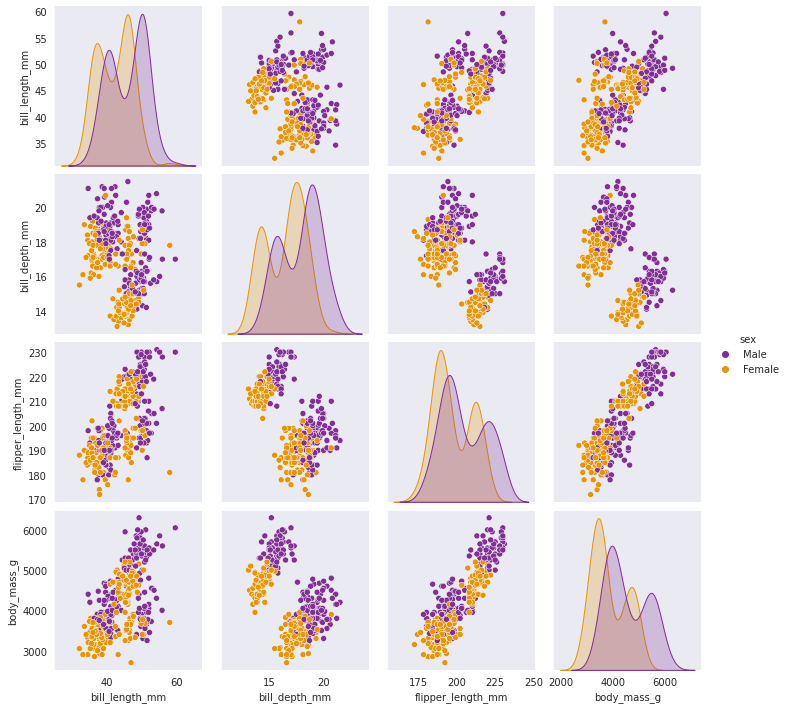

In [88]:
with sns.axes_style('dark'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="CMRmap")

**Comentário:**  

*   A massa corporal está positivamente relacionada com os atributos ```bill_length_mm```, ```bill_depth_mm``` e 	```flipper_length_mm```;
*  Pinguins machos tendem a possuir maior massa corporal.




 - Atributos por espécie:

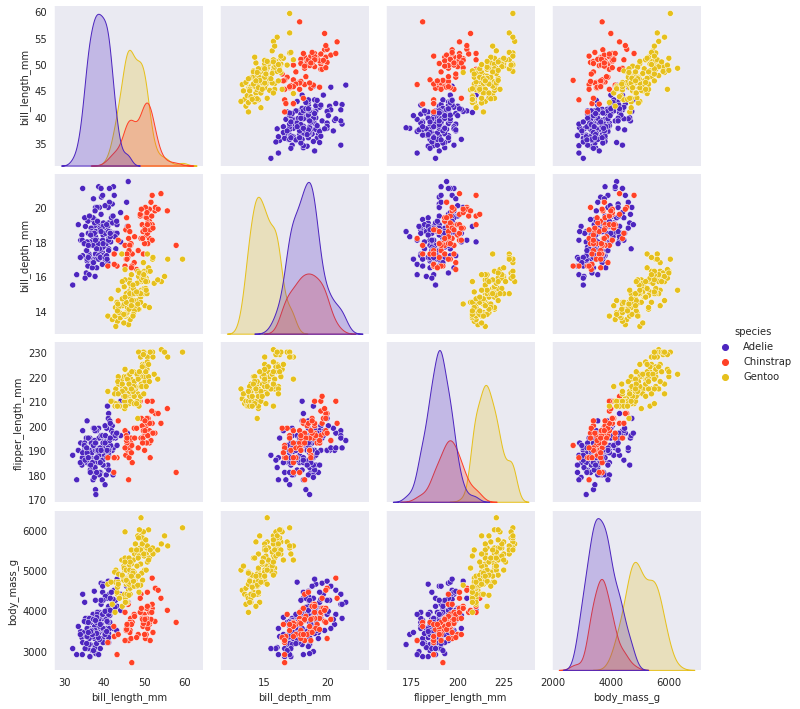

In [89]:
with sns.axes_style('dark'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="CMRmap")

**Comentário:**

*   A massa corporal está positivamente relacionada com os atributos ```bill_length_mm```, ```bill_depth_mm``` e 	```flipper_length_mm```;
*  Pinguins da espécie **Gentoo** tendem a possuir maior massa corporal, enquanto os da espécie **Chinstrap** tendem a possuir menor massa corporal.

 - Atributos por ilha:

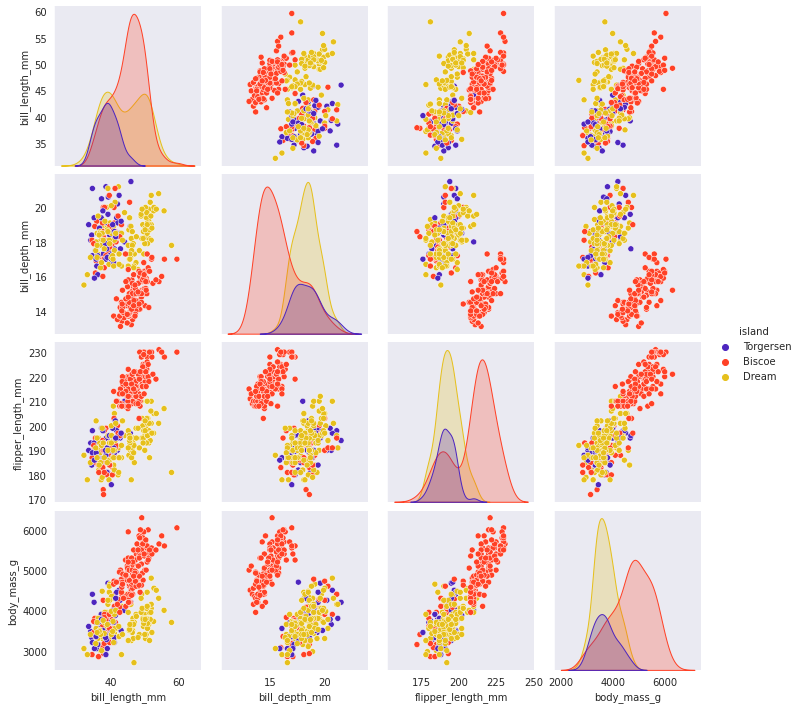

In [90]:
with sns.axes_style('dark'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="CMRmap")

**Comentário:** 

*   A massa corporal está positivamente relacionada com os atributos ```bill_length_mm```, ```bill_depth_mm``` e 	```flipper_length_mm```;
*  Pinguins da ilha **Biscoe** tendem a possuir maior massa corporal.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [91]:
penguim.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [92]:
penguim.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [93]:
['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],

(['species',
  'island',
  'bill_length_mm',
  'bill_depth_mm',
  'flipper_length_mm',
  'body_mass_g',
  'sex'],)

In [94]:
# resposta da questão 2.1
penguim['bill_length_mm'].fillna(penguim['bill_length_mm'].mean(), inplace=True)
penguim['bill_depth_mm'].fillna(penguim['bill_depth_mm'].mean(), inplace=True)
penguim['flipper_length_mm'].fillna(penguim['flipper_length_mm'].mean(), inplace=True)
penguim['body_mass_g'].fillna(penguim['body_mass_g'].mean(), inplace=True)

#checagem:
penguim.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

**Como temos 11 dados faltantes no sexo, podemos retirar essas linhas**

In [95]:
penguim.dropna(inplace=True, axis=0)
penguim.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [96]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [97]:
# resposta da questão 2.2
penguim['bill_length_mm_std'] = penguim['bill_length_mm'].apply(lambda valor: (valor - penguim['bill_length_mm'].mean()) / penguim['bill_length_mm'].std())
penguim['bill_depth_mm_std'] = penguim['bill_depth_mm'].apply(lambda valor: (valor - penguim['bill_depth_mm'].mean()) / penguim['bill_depth_mm'].std())
penguim['flipper_length_mm_std'] = penguim['flipper_length_mm'].apply(lambda valor: (valor - penguim['flipper_length_mm'].mean()) / penguim['flipper_length_mm'].std())

### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [98]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   species                333 non-null    object 
 1   island                 333 non-null    object 
 2   bill_length_mm         333 non-null    float64
 3   bill_depth_mm          333 non-null    float64
 4   flipper_length_mm      333 non-null    float64
 5   body_mass_g            333 non-null    float64
 6   sex                    333 non-null    object 
 7   bill_length_mm_std     333 non-null    float64
 8   bill_depth_mm_std      333 non-null    float64
 9   flipper_length_mm_std  333 non-null    float64
dtypes: float64(7), object(3)
memory usage: 28.6+ KB


In [99]:
penguim['species'].drop_duplicates()

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object

In [100]:
penguim['island'].drop_duplicates()

0     Torgersen
20       Biscoe
30        Dream
Name: island, dtype: object

In [101]:
penguim['sex'].drop_duplicates()

0      Male
1    Female
Name: sex, dtype: object

In [102]:
# resposta da questão 2.3
penguim['species_nom_Adelie'] = penguim['species'].apply(lambda valor: 1 if valor == 'Adelie' else 0)
penguim['species_nom_Chinstrap'] = penguim['species'].apply(lambda valor: 1 if valor == 'Chinstrap' else 0)
penguim['species_nom_Gentoo'] = penguim['species'].apply(lambda valor: 1 if valor == 'Gentoo' else 0)
penguim['island_ord_Torgersen'] = penguim['island'].apply(lambda valor: 1 if valor == 'Torgersen' else 0)
penguim['island_ord_Biscoe'] = penguim['island'].apply(lambda valor: 1 if valor == 'Biscoe' else 0)
penguim['island_ord_Dream'] = penguim['island'].apply(lambda valor: 1 if valor == 'Dream' else 0)
penguim['sex_nom_Male'] = penguim['sex'].apply(lambda valor: 1 if valor == 'Male' else 0)
penguim['sex_nom_Female'] = penguim['sex'].apply(lambda valor: 1 if valor == 'Female' else 0)

In [103]:
#checagem:
penguim.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_nom_Adelie,species_nom_Chinstrap,species_nom_Gentoo,island_ord_Torgersen,island_ord_Biscoe,island_ord_Dream,sex_nom_Male,sex_nom_Female
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,1,0,0,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,1,0,0,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,1,0,0,1,0,0,0,1


### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [104]:
penguim_raw_data = penguim.copy()
penguim.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'bill_length_mm_std',
       'bill_depth_mm_std', 'flipper_length_mm_std', 'species_nom_Adelie',
       'species_nom_Chinstrap', 'species_nom_Gentoo', 'island_ord_Torgersen',
       'island_ord_Biscoe', 'island_ord_Dream', 'sex_nom_Male',
       'sex_nom_Female'],
      dtype='object')

In [105]:
# resposta da questão 2.4
penguim.drop([
  'species',
  'island',
  'bill_length_mm',
  'bill_depth_mm',
  'flipper_length_mm', 
  'sex'
], axis=1, inplace=True)

In [106]:
penguim.columns

Index(['body_mass_g', 'bill_length_mm_std', 'bill_depth_mm_std',
       'flipper_length_mm_std', 'species_nom_Adelie', 'species_nom_Chinstrap',
       'species_nom_Gentoo', 'island_ord_Torgersen', 'island_ord_Biscoe',
       'island_ord_Dream', 'sex_nom_Male', 'sex_nom_Female'],
      dtype='object')

### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [107]:
# resposta da questão 2.5
from sklearn.model_selection import train_test_split

atributos = penguim.drop('body_mass_g', axis=1).values
resposta = penguim['body_mass_g'].values
xtrain, xtest, ytrain, ytest = train_test_split(atributos, resposta, test_size = 0.33, random_state = 987)

In [108]:
xtrain.shape

(223, 11)

In [109]:
xtest.shape

(110, 11)

In [110]:
#checagem:
xtest.shape[0] / (xtest.shape[0] + xtrain.shape[0])

0.3303303303303303

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [111]:
# resposta da questão 3.1
from sklearn.linear_model import LinearRegression

modelo_reg_linear = LinearRegression()
modelo_reg_linear.fit(xtrain, ytrain)

modelo_reg_linear.__dict__

{'_residues': array([], dtype=float64),
 'coef_': array([  48.39426276,  119.29391115,  270.49974718, -229.50298688,
        -413.01381328,  642.51680016,  -95.67151445,  104.64647839,
          -8.97496394,  189.40969892, -189.40969892]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': 4153.9742977251035,
 'n_features_in_': 11,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'rank_': 8,
 'singular_': array([2.39045743e+01, 1.62895888e+01, 1.13193099e+01, 5.82659697e+00,
        5.62255322e+00, 5.30999166e+00, 3.20583096e+00, 2.08917449e+00,
        1.50805952e-15, 1.40977534e-15, 8.99775733e-16])}

**MODELO**

$ y = 4154 + 48.4 \ x_1 + 119.3 \ x_2 + 270.5 \ x_3 - 229.5 \ x_4 - 413.0 \ x_5 + 642.5 \ x_6 - 95.7 \ x_7 + 104.6 \ x_8 - 9.0 \ x_9 + 189.4 \ x_{10} - 189.4 \ x_{11} $

Onde:

$x_i$: atributos na ordem das colunas do *dataframe*.

### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [112]:
# resposta da questão 3.2
from sklearn.metrics import mean_squared_error

y_predict = modelo_reg_linear.predict(xtest)

rmse = np.sqrt( mean_squared_error(ytest, y_predict) )
print(f'RMSE: {round(rmse,1)}')

RMSE: 311.9


In [113]:
rmse / penguim['body_mass_g'].mean()

0.07413887050581604

**RMSE** $\approx$ 312 g (**7.4% da média** de massa corporal)

## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [114]:
penguim.columns

Index(['body_mass_g', 'bill_length_mm_std', 'bill_depth_mm_std',
       'flipper_length_mm_std', 'species_nom_Adelie', 'species_nom_Chinstrap',
       'species_nom_Gentoo', 'island_ord_Torgersen', 'island_ord_Biscoe',
       'island_ord_Dream', 'sex_nom_Male', 'sex_nom_Female'],
      dtype='object')

In [115]:
# resposta da questão 4.1
bill_length_mm_std = (38.2 - penguim_raw_data['bill_length_mm'].mean() )/ penguim_raw_data['bill_length_mm'].std() 
bill_depth_mm_std = (18.1 - penguim_raw_data['bill_depth_mm'].mean() )/ penguim_raw_data['bill_depth_mm'].std()
flipper_length_mm_std = (185 - penguim_raw_data['flipper_length_mm'].mean() )/ penguim_raw_data['flipper_length_mm'].std()


novo_penguim = np.array([
  bill_length_mm_std,
  bill_depth_mm_std,
  flipper_length_mm_std,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0
])

novo_penguim

array([-1.05926936,  0.47487218, -1.13921478,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ])

In [117]:
predicao_novo_penguim = modelo_reg_linear.predict(novo_penguim.reshape(1,-1))
print(predicao_novo_penguim)

3915.756978204772


A massa corporal do `novo_penguim` é 3915.8 g $\approx$ **3.9 kg**

---